<a href="https://colab.research.google.com/github/HaHyunkyung/Prediction-of-disabled-call-taxi-waiting-time/blob/main/1_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 장애인콜택시 대기시간 예측
## 단계1.데이터 전처리

* 1.데이터를 탐색하며 정보 획득
    * 데이터는 2015-01-01 ~ 2022-12-31 까지의 서울 장애인 콜택시 운행 정보. 평균대기시간을 예측하고자 함.

* 2.분석을 위한 데이터 구조 만들기
    * 문제정의 :
        * 전 날 콜택시 운행이 종료되었을 때, 다음 날 대기시간을 예측하고자 함.

        * 만약 다음 날 대기시간을 예측할 수 있다면, 일정 범위 내에서 배차를 조절할 수 있을 뿐만 아니라, 향후 교통약자의 이동 편의 증진을 위한 정책 수립 및 개선에 기여가 가능함



## 1.환경설정

### (1) 경로 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### (2) 라이브러리 설치 및 불러오기

In [ ]:
!pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


#### 2) 라이브러리 로딩

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

### (3) 데이터 불러오기

#### 1) 데이터로딩

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/장애인 콜택시 대기시간 예측/open_data.csv')

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/장애인 콜택시 대기시간 예측/weather.csv')

#### 2) 기본 정보 조회

In [ ]:
display(data.head(2))
display(data.tail(2))
display(data.describe())
display(data.info())

,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
0,2015-01-01,213,1023,924,23.2,2427,10764
1,2015-01-02,420,3158,2839,17.2,2216,8611


,기준일,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
2920,2022-12-30,600,5293,4200,38.3,2183,8155
2921,2022-12-31,263,2167,1806,33.7,2318,9435


,차량운행,접수건,탑승건,평균대기시간,평균요금,평균승차거리
count,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000,2922.000000
mean,418.701916,3925.607803,3283.895277,40.305681,2304.272416,9253.500000
std,133.755162,1509.741713,1249.165876,14.098550,107.260080,1019.198152
min,132.000000,527.000000,462.000000,17.200000,2131.000000,7672.000000
25%,278.000000,2162.500000,1779.000000,29.600000,2228.000000,8521.000000
50%,454.000000,4720.500000,3932.500000,38.200000,2257.000000,8821.500000
75%,522.000000,5110.000000,4241.000000,48.600000,2400.750000,10153.000000
max,1413.000000,6182.000000,5189.000000,96.100000,2733.000000,14136.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준일     2922 non-null   object 
 1   차량운행    2922 non-null   int64  
 2   접수건     2922 non-null   int64  
 3   탑승건     2922 non-null   int64  
 4   평균대기시간  2922 non-null   float64
 5   평균요금    2922 non-null   int64  
 6   평균승차거리  2922 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 159.9+ KB


None

In [ ]:
data['평균대기시간'].max()

96.1

In [ ]:
display(weather.head(2))
display(weather.tail(2))
display(weather.describe())
display(weather.info())

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16


,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
4016,2022-12-30,2.1,-4.0,0.0,87.0,38.0,10.84
4017,2022-12-31,-4.4,-4.4,0.0,66.0,66.0,0.00


,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,17.794301,9.309731,3.400722,78.873395,40.912593,13.035294
std,10.859689,10.881519,12.641311,14.054773,16.383352,6.740793
min,-11.200000,-18.500000,0.000000,29.000000,7.000000,0.000000
25%,8.400000,0.300000,0.000000,70.000000,29.000000,7.970000
50%,19.600000,9.900000,0.000000,81.000000,39.000000,12.260000
75%,27.300000,19.000000,0.375000,90.000000,51.000000,18.017500
max,39.400000,30.400000,178.900000,100.000000,98.000000,30.790000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4018 non-null   object 
 1   temp_max         4018 non-null   float64
 2   temp_min         4018 non-null   float64
 3   rain(mm)         4018 non-null   float64
 4   humidity_max(%)  4018 non-null   float64
 5   humidity_min(%)  4018 non-null   float64
 6   sunshine(MJ/m2)  4018 non-null   float64
dtypes: float64(6), object(1)
memory usage: 219.9+ KB


None

#### 3) 칼럼이름을 영어로 변경


In [ ]:
data.rename(columns = {'기준일':'Date','차량운행':'Car_count','접수건':'Register','탑승건':'Boarding','평균대기시간':'Wait_time','평균요금':'Average_mean','평균승차거리':'Riding_mean'},inplace=True)


In [ ]:
display(data.head(1))

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean
0,2015-01-01,213,1023,924,23.2,2427,10764


### (1) 주기별 분석을 위해서 날짜 변수 추가하기

In [ ]:
df = data.copy()

In [ ]:
df.head(1)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean
0,2015-01-01,213,1023,924,23.2,2427,10764


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Day_of_week'] = df['Date'].dt.day_name() #요일별
df['Month'] = df['Date'].dt.month #월별
df['Year'] = df['Date'].dt.year #연도별

In [ ]:
df.head(1)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015


### (2) 일별

* 차량 운행수

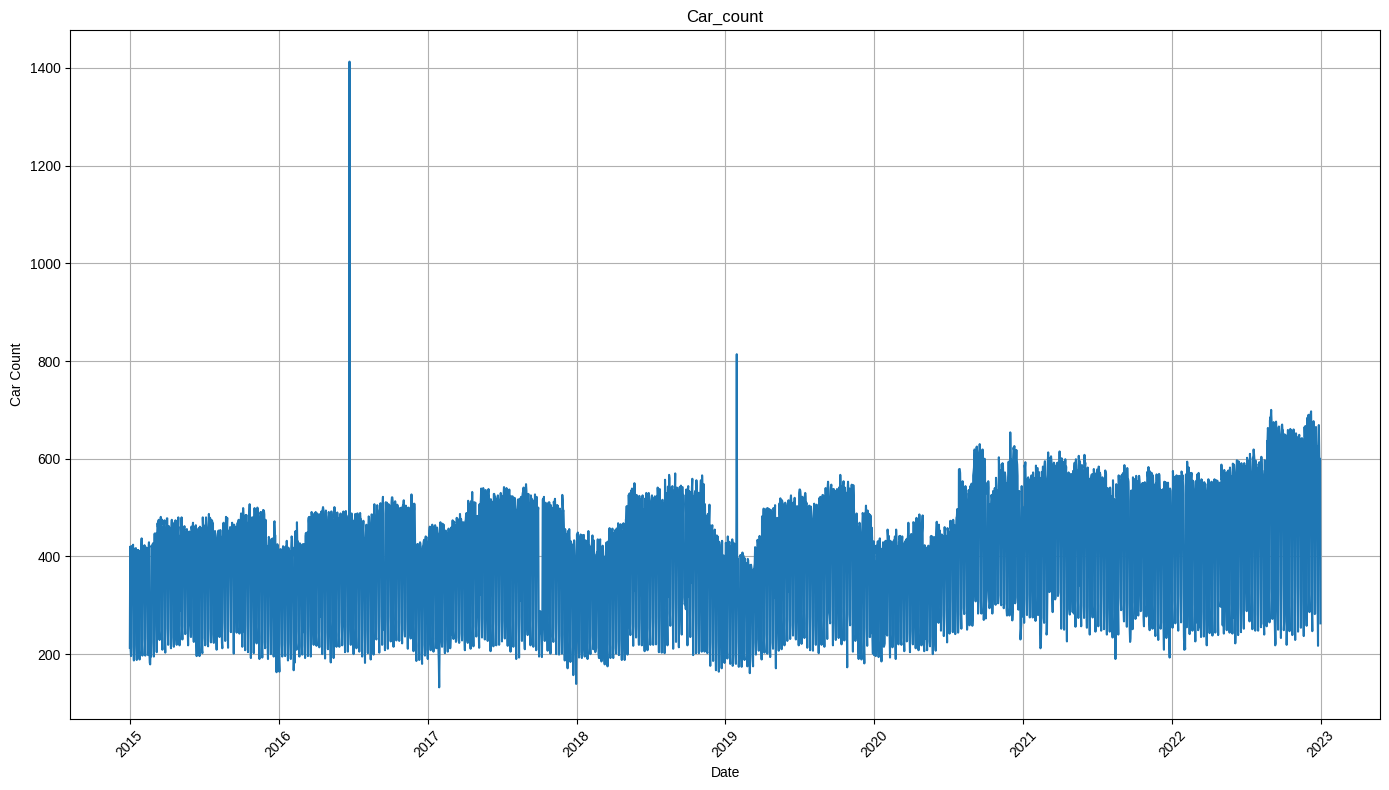

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Car_count'])
plt.title('Car_count')
plt.xlabel('Date')
plt.ylabel('Car Count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)
plt.tight_layout()
plt.show()

2016년 6월쯤, 2019년 1~2월쯤 한번씩 튐

2019년까지는 겨울에는 차량 운행수가 적고 봄,여름,가을엔 많았는데

2020년부터 양상이 바뀜

* 접수건, 탑승건

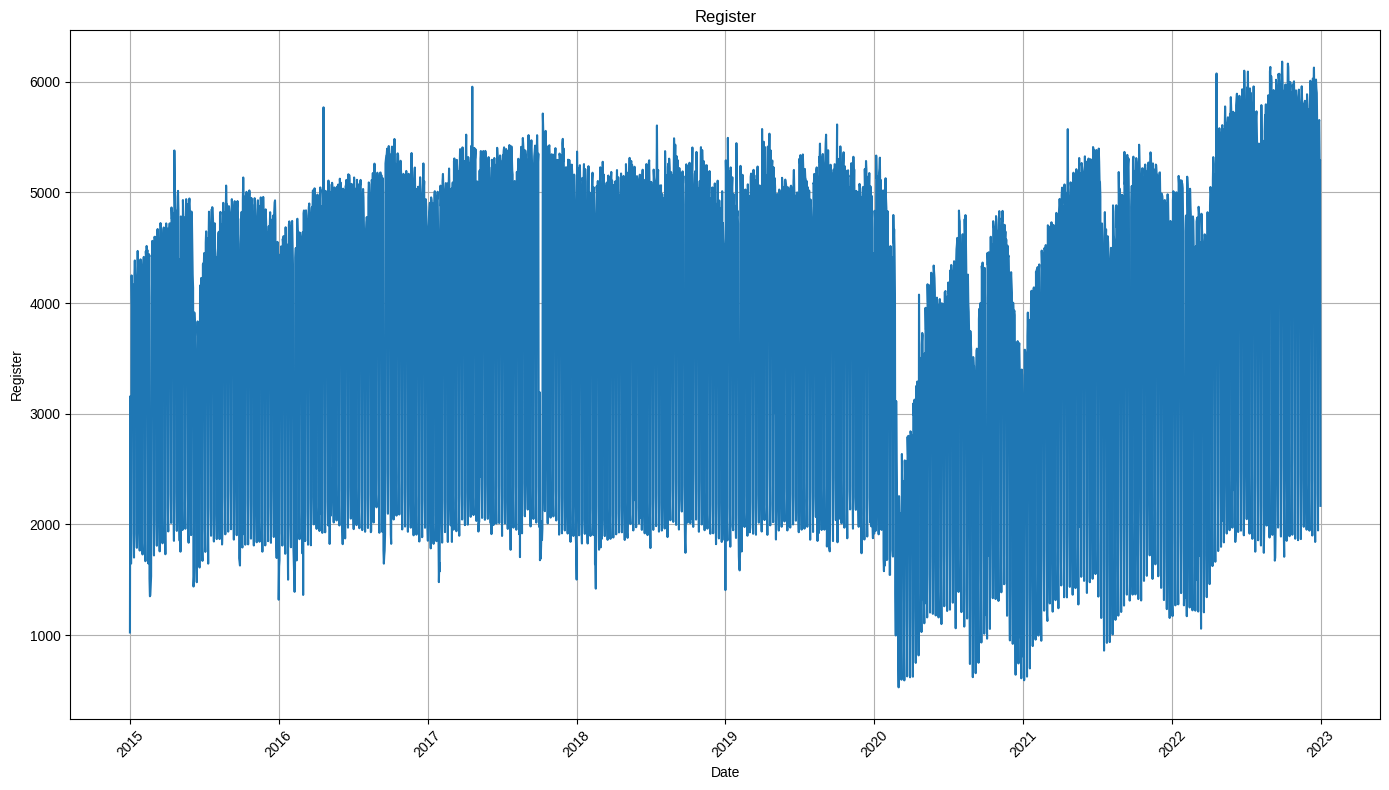

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Register'])
plt.title('Register')
plt.xlabel('Date')
plt.ylabel('Register')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)
plt.tight_layout()
plt.show()

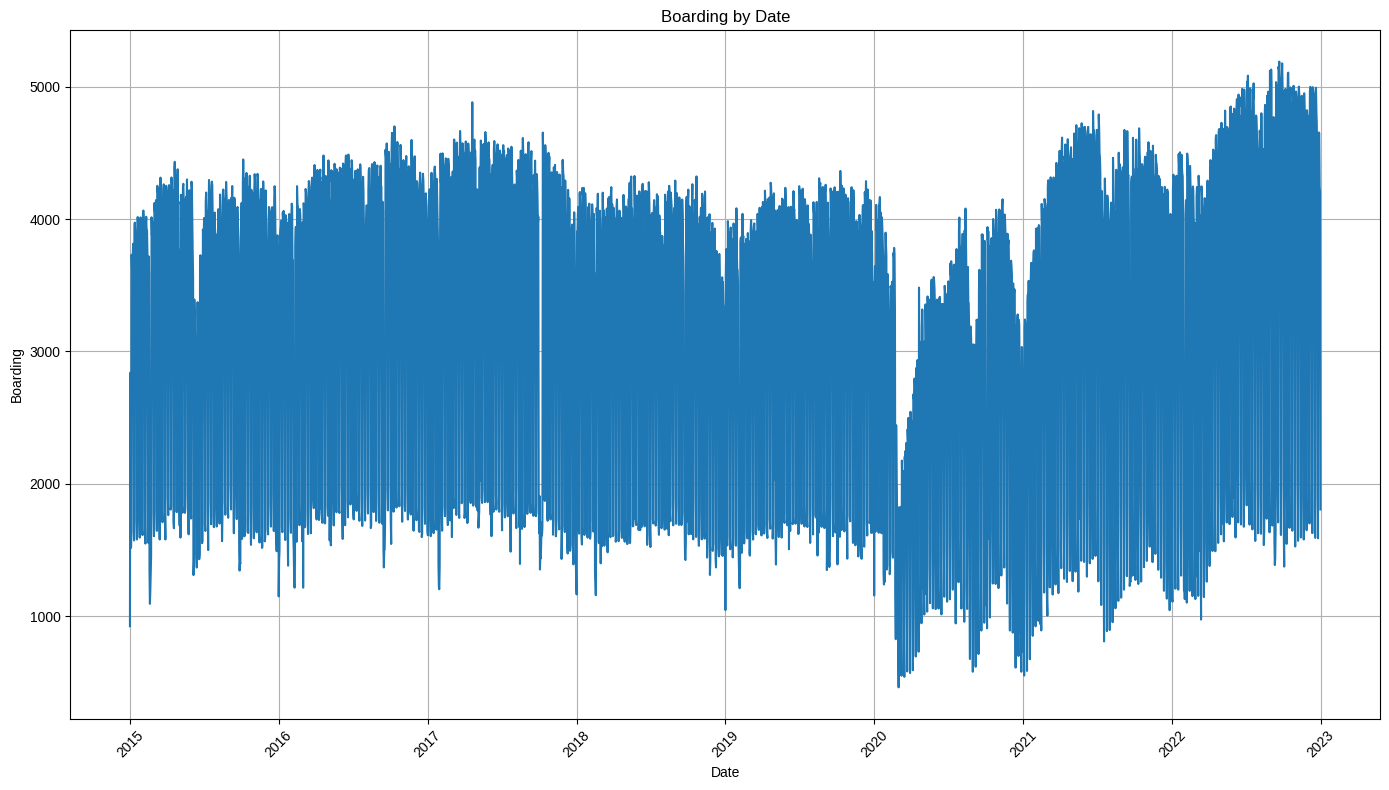

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Boarding'])
plt.title('Boarding by Date')
plt.xlabel('Date')
plt.ylabel('Boarding')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)
plt.tight_layout()
plt.show()

예약건과 탑승건 모두 코로나 창궐 이후 훅 떨어졌다가 점차 오르는 모습

* 대기시간

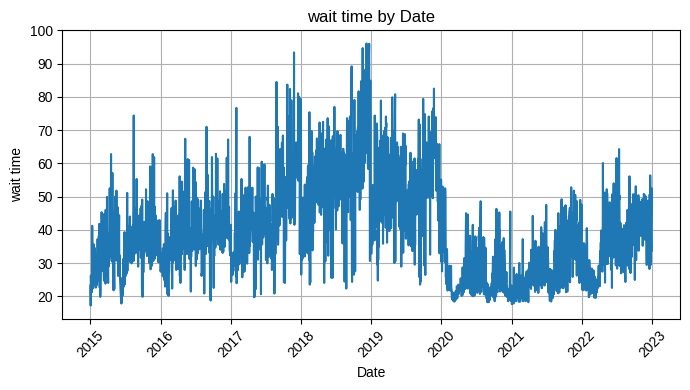

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(df['Date'], df['Wait_time'])
plt.title('wait time by Date')
plt.xlabel('Date')
plt.ylabel('wait time')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)
plt.tight_layout()
plt.show()


2020년부터 대기 시간이 훅 줄어든 모습

단순히 감염병으로 인한 외출 자제로 공급이 남아 도는 모습일까?

2018년, 2019년이 가장 오래 대기함

* 운임

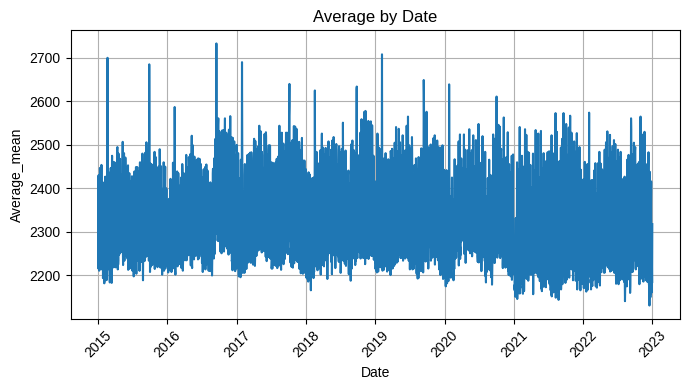

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(df['Date'], df['Average_mean'])
plt.title('Average by Date')
plt.xlabel('Date')
plt.ylabel('Average_mean')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)
plt.tight_layout()
plt.show()


* 이동거리

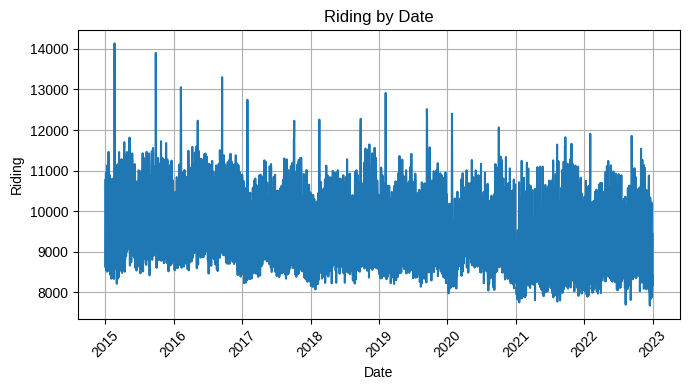

In [ ]:
plt.figure(figsize=(7, 4))
plt.plot(df['Date'], df['Riding_mean'])
plt.title('Riding by Date')
plt.xlabel('Date')
plt.ylabel('Riding')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.grid(True)
plt.tight_layout()
plt.show()

### (3) 요일별

* 차량 운행수

In [ ]:
mean_car_count = df.groupby('Day_of_week')['Car_count'].mean()

In [ ]:
mean_car_count

,Car_count
Day_of_week,
Friday,485.107656
Monday,485.014388
Saturday,262.177033
Sunday,224.767386
Thursday,494.078947
Tuesday,495.076739
Wednesday,484.726619


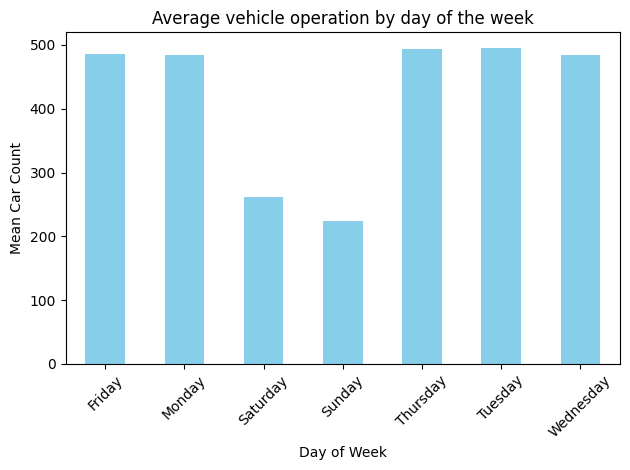

In [ ]:
mean_car_count.plot(kind='bar', color='skyblue')
plt.title('Average vehicle operation by day of the week')
plt.xlabel('Day of Week')
plt.ylabel('Mean Car Count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


요일별 차량 운행 평균 순위

Tuesday	495.076739

Thursday	494.078947

Friday	485.107656

Monday	485.014388

Wednesday	484.726619

Saturday	262.177033

Sunday	224.767386


* 접수건, 탑승건

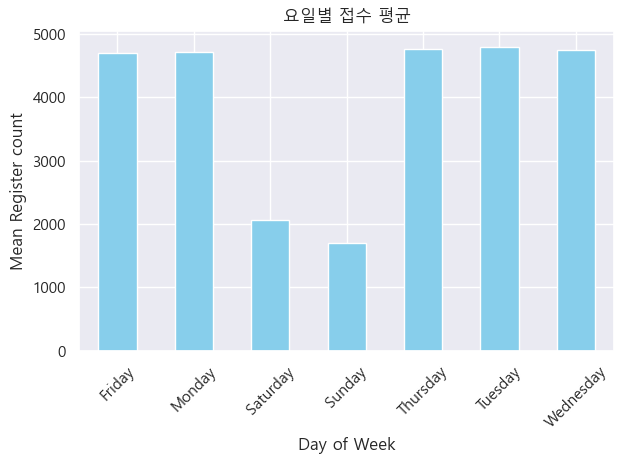

In [ ]:
mean_car_count = df.groupby('Day_of_week')['Register'].mean()
mean_car_count.plot(kind='bar', color='skyblue')
plt.title('요일별 접수 평균')
plt.xlabel('Day of Week')
plt.ylabel('Mean Register count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


In [ ]:
mean_car_count = df.groupby('Day_of_week')['Register'].mean()
mean_car_count

,Register
Day_of_week,
Friday,4692.066986
Monday,4715.040767
Saturday,2069.081340
Sunday,1702.781775
Thursday,4760.677033
Tuesday,4800.884892
Wednesday,4739.333333


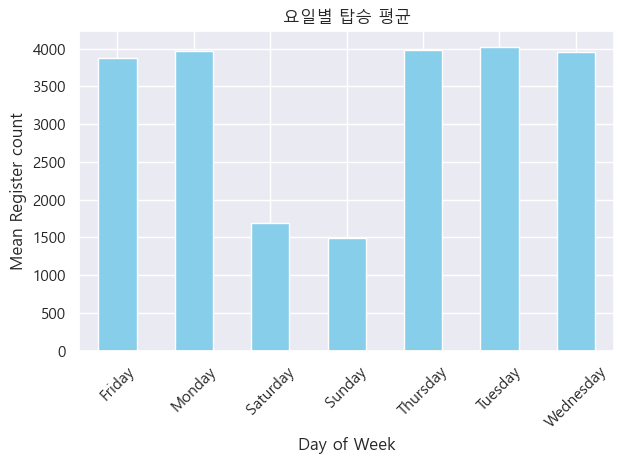

In [ ]:
mean_car_count = df.groupby('Day_of_week')['Boarding'].mean()
mean_car_count.plot(kind='bar', color='skyblue')
plt.title('요일별 탑승 평균')
plt.xlabel('Day of Week')
plt.ylabel('Mean Register count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()



* 대기시간

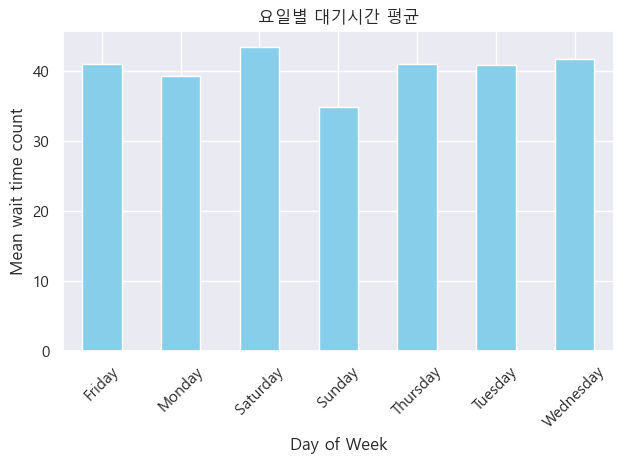

In [ ]:
mean_car_count = df.groupby('Day_of_week')['Wait_time'].mean()
mean_car_count.plot(kind='bar', color='skyblue')
plt.title('요일별 대기시간 평균')
plt.xlabel('Day of Week')
plt.ylabel('Mean wait time count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


* 운임

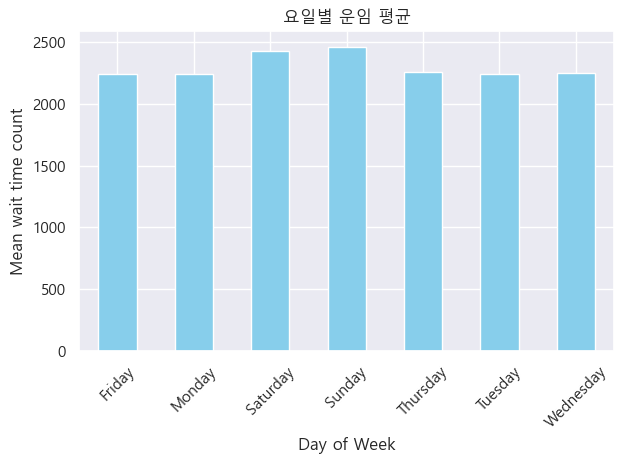

In [ ]:
mean_car_count = df.groupby('Day_of_week')['Average_mean'].mean()
mean_car_count.plot(kind='bar', color='skyblue')
plt.title('요일별 운임 평균')
plt.xlabel('Day of Week')
plt.ylabel('Mean wait time count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 이동거리

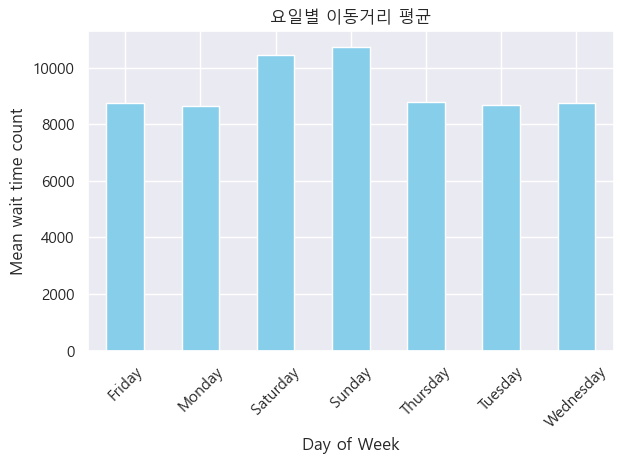

In [ ]:
mean_car_count = df.groupby('Day_of_week')['Riding_mean'].mean()
mean_car_count.plot(kind='bar', color='skyblue')
plt.title('요일별 이동거리 평균')
plt.xlabel('Day of Week')
plt.ylabel('Mean wait time count')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()

### (4) 월별

In [ ]:
df.head(1)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015


* 차량 운행수

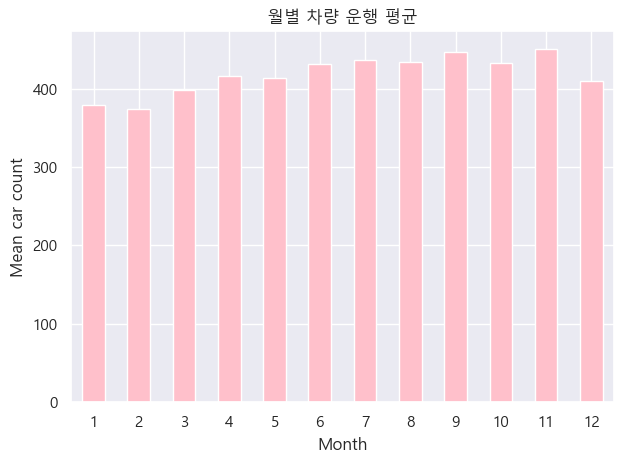

In [ ]:
month_car_count = df.groupby('Month')['Car_count'].mean()
month_car_count.plot(kind='bar', color='pink')
plt.title('월별 차량 운행 평균')
plt.xlabel('Month')
plt.ylabel('Mean car count')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 접수건, 탑승건

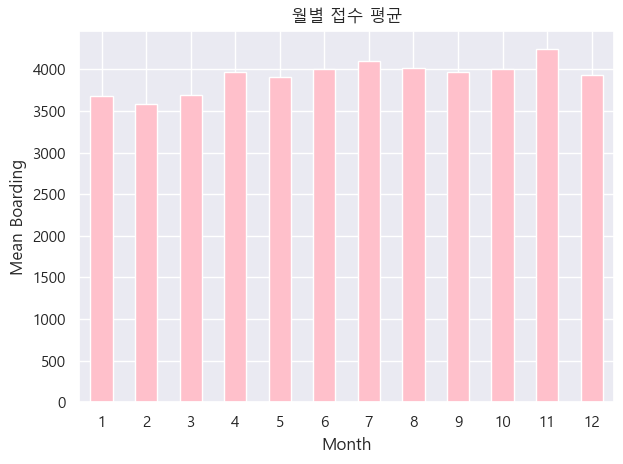

In [ ]:
month_Register_count = df.groupby('Month')['Register'].mean()
month_Register_count.plot(kind='bar', color='pink')
plt.title('월별 접수 평균')
plt.xlabel('Month')
plt.ylabel('Mean Boarding')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

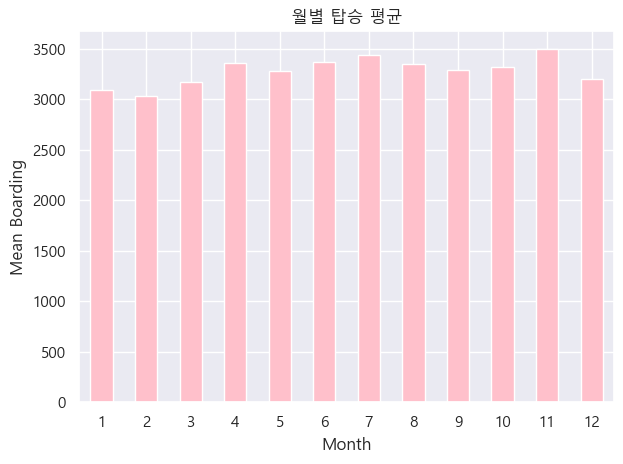

In [ ]:
month_Boarding_count = df.groupby('Month')['Boarding'].mean()
month_Boarding_count.plot(kind='bar', color='pink')
plt.title('월별 탑승 평균')
plt.xlabel('Month')
plt.ylabel('Mean Boarding')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 대기시간

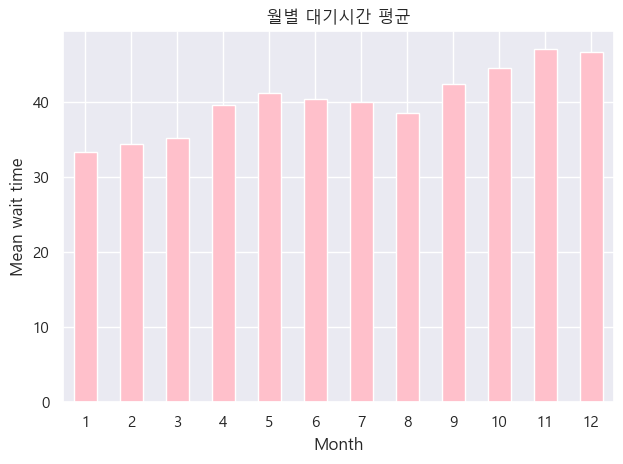

In [ ]:
month_waittime_count = df.groupby('Month')['Wait_time'].mean()
month_waittime_count.plot(kind='bar', color='pink')
plt.title('월별 대기시간 평균')
plt.xlabel('Month')
plt.ylabel('Mean wait time')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 운임

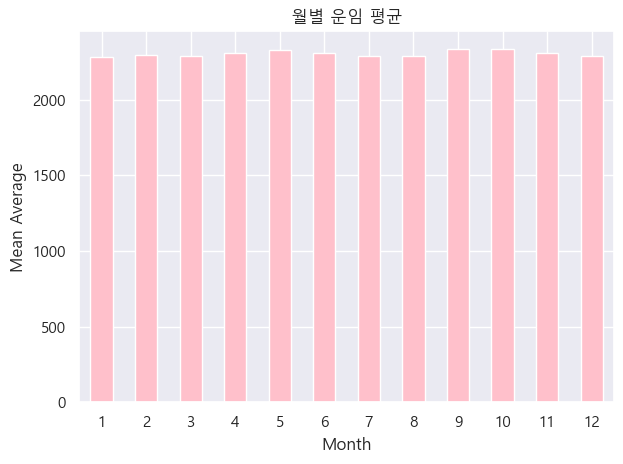

In [ ]:
month_Average_mean_count = df.groupby('Month')['Average_mean'].mean()
month_Average_mean_count.plot(kind='bar', color='pink')
plt.title('월별 운임 평균')
plt.xlabel('Month')
plt.ylabel('Mean Average')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 이동거리

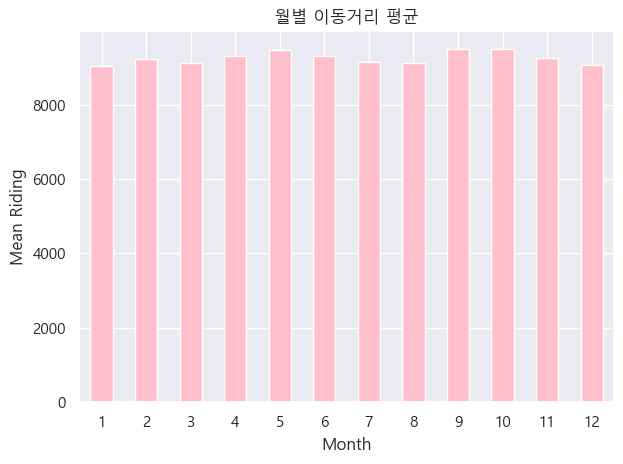

In [ ]:
month_Riding_mean_count = df.groupby('Month')['Riding_mean'].mean()
month_Riding_mean_count.plot(kind='bar', color='pink')
plt.title('월별 이동거리 평균')
plt.xlabel('Month')
plt.ylabel('Mean Riding')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

### (5) 연도별

In [ ]:
df.head(1)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015


* 차량 운행수

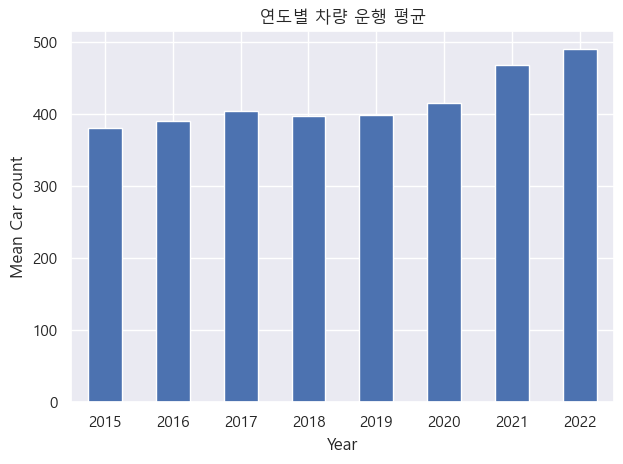

In [ ]:
month_Riding_mean_count = df.groupby('Year')['Car_count'].mean()
month_Riding_mean_count.plot(kind='bar')
plt.title('연도별 차량 운행 평균')
plt.xlabel('Year')
plt.ylabel('Mean Car count')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 접수건, 탑승건

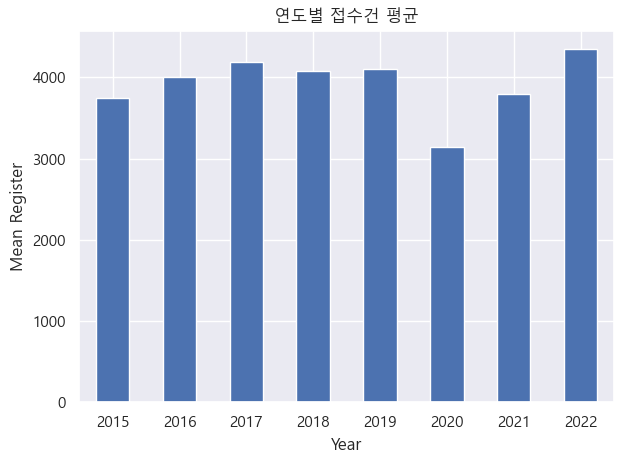

In [ ]:
month_Register_count = df.groupby('Year')['Register'].mean()
month_Register_count.plot(kind='bar')
plt.title('연도별 접수건 평균')
plt.xlabel('Year')
plt.ylabel('Mean Register')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

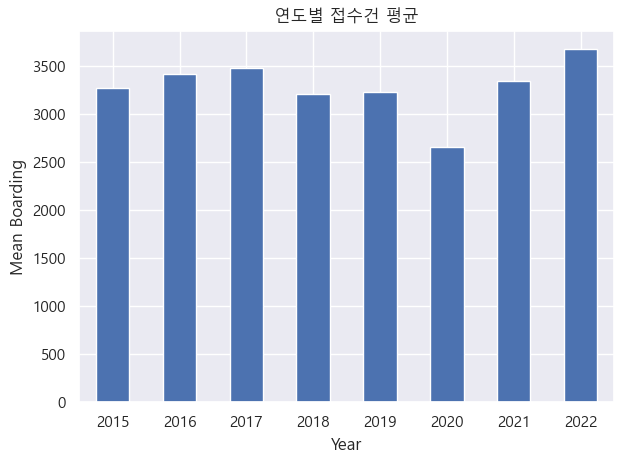

In [ ]:

month_Boarding_count = df.groupby('Year')['Boarding'].mean()
month_Boarding_count.plot(kind='bar')
plt.title('연도별 접수건 평균')
plt.xlabel('Year')
plt.ylabel('Mean Boarding')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()


* 대기시간

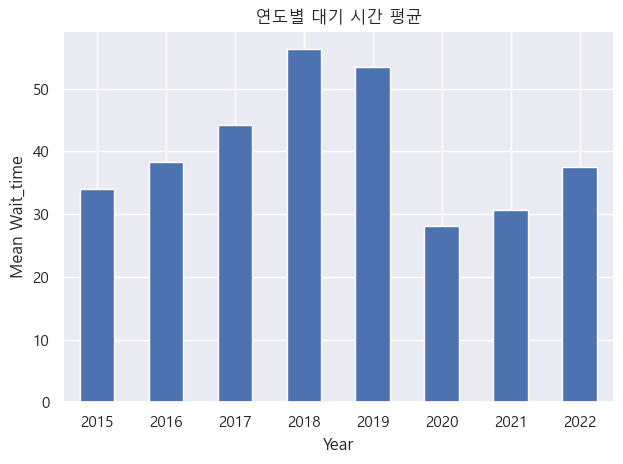

In [ ]:

month_Wait_time_count = df.groupby('Year')['Wait_time'].mean()
month_Wait_time_count.plot(kind='bar')
plt.title('연도별 대기 시간 평균')
plt.xlabel('Year')
plt.ylabel('Mean Wait_time')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 운임

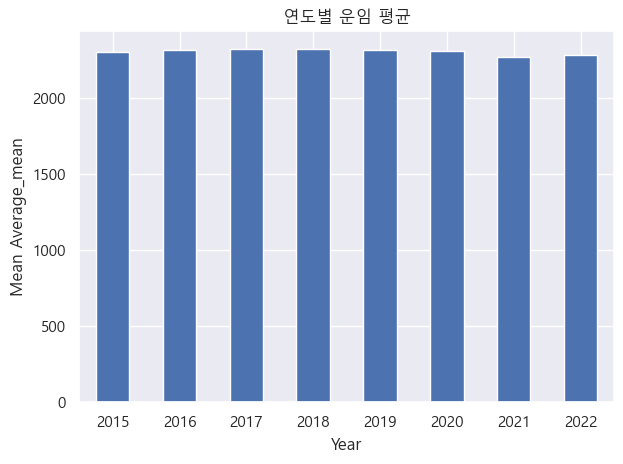

In [ ]:

month_Average_mean_count = df.groupby('Year')['Average_mean'].mean()
month_Average_mean_count.plot(kind='bar')
plt.title('연도별 운임 평균')
plt.xlabel('Year')
plt.ylabel('Mean Average_mean')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

* 탑승시간 평균

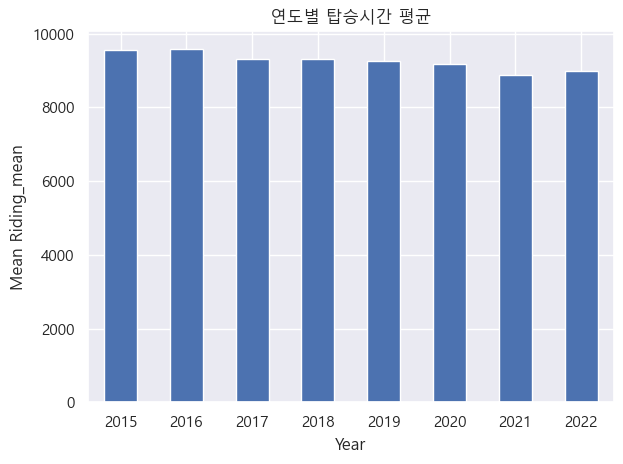

In [ ]:
month_Riding_mean_count = df.groupby('Year')['Riding_mean'].mean()
month_Riding_mean_count.plot(kind='bar')
plt.title('연도별 탑승시간 평균')
plt.xlabel('Year')
plt.ylabel('Mean Riding_mean')
plt.xticks(rotation=360)  # x축 레이블 회전
plt.tight_layout()
plt.show()

## 3.데이터 구조 만들기


### (1) target 만들기

In [ ]:
display(weather.head(1))
display(df.head(5))

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.9


,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,2015
2,2015-01-03,209,1648,1514,26.2,2377,10198,Saturday,1,2015
3,2015-01-04,196,1646,1526,24.5,2431,10955,Sunday,1,2015
4,2015-01-05,421,4250,3730,26.2,2214,8663,Monday,1,2015


In [ ]:
df['waiting_time'] = df['Wait_time'].shift(periods=-1)
df.head(5)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year,waiting_time
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015,17.2
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,2015,26.2
2,2015-01-03,209,1648,1514,26.2,2377,10198,Saturday,1,2015,24.5
3,2015-01-04,196,1646,1526,24.5,2431,10955,Sunday,1,2015,26.2
4,2015-01-05,421,4250,3730,26.2,2214,8663,Monday,1,2015,23.6


### (2) 날씨 데이터 붙이기

In [ ]:
weather.head(4)

,Date,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2012-01-01,0.4,-6.6,0.0,77.0,45.0,4.90
1,2012-01-02,-1.2,-8.3,0.0,80.0,48.0,6.16
2,2012-01-03,-0.4,-6.6,0.4,86.0,45.0,4.46
3,2012-01-04,-4.6,-9.5,0.0,66.0,38.0,8.05


In [ ]:
weather['Date'] = pd.to_datetime(weather['Date'])
weather['Date'] = weather['Date'].shift(periods = -1)
weather['temp_max'] = weather['temp_max'].shift(periods=-1)
weather['temp_min'] = weather['temp_min'].shift(periods=-1)
weather['rain(mm)'] = weather['rain(mm)'].shift(periods=-1)
weather['humidity_max(%)'] = weather['humidity_max(%)'].shift(periods=-1)
weather['humidity_min(%)'] = weather['humidity_min(%)'].shift(periods=-1)
weather['sunshine(MJ/m2)'] = weather['sunshine(MJ/m2)'].shift(periods=-1)
weather.head(3)
merged_df = pd.merge(df, weather, on='Date', how='inner')

In [ ]:
merged_df.head(3)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year,waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2)
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,2015,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07
2,2015-01-03,209,1648,1514,26.2,2377,10198,Saturday,1,2015,24.5,2.4,-9.2,0.0,73.0,37.0,8.66


### (3) 새로운 feature를 생성

In [ ]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Day_of_week'] = merged_df['Date'].dt.day_name()
merged_df['Day_of_week'] = pd.Categorical(merged_df['Day_of_week'],
                                   categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
merged_df['month'] = merged_df['Date'].dt.month

merged_df['season'] = np.where(merged_df['Month'].isin([3,4,5]), 'Spring',
                            np.where(merged_df['Month'].isin([6,7,8]), 'Summer',
                                     np.where(merged_df['Month'].isin([9,10,11]), 'Fall', 'Winter')))
merged_df['season'] = pd.Categorical(merged_df['season'], categories=['Spring','Summer','Fall','Winter'])

merged_df['Year'] = merged_df['Date'].dt.year
merged_df.head(2)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year,waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,season
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79,1,Winter
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,2015,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07,1,Winter


#### 2) 공휴일 정보

* 휴무일 데이터 패키지 설치

In [ ]:
!pip install workalendar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.0 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732003 sha256=e8f63e65625c0872eb1ed88cc91a55fec6a1ae7da774ad2ff81b5f35f7783d1d
  Stored in directory: /root/.cache/pip/wheels/8f/bd/f9/5c4c39b529e0322b08979e1c465e203218bc2cca75d20f7df5
Successfully built pymeeus


In [ ]:
from workalendar.asia import SouthKorea
cal = SouthKorea()
pd.DataFrame(cal.holidays(2023))

,0,1
0,2023-01-01,New year
1,2023-01-21,Korean New Year's Day
2,2023-01-22,Korean New Year's Day
3,2023-01-23,Korean New Year's Day
4,2023-03-01,Independence Day
5,2023-05-05,Children's Day
6,2023-05-26,Buddha's Birthday
7,2023-06-06,Memorial Day
8,2023-08-15,Liberation Day
9,2023-09-28,Midautumn Festival


In [ ]:
from workalendar.asia import SouthKorea

cal = SouthKorea()
holiday = pd.DataFrame()
for y in range(2015, 2023) :
     holiday = pd.concat([holiday, pd.DataFrame(cal.holidays(y))], axis = 0)

holiday.columns = ['Date', 'holiday']
holiday['Date'] = pd.to_datetime(holiday['Date'])
holiday['holiday'] = 1
holiday

,Date,holiday
0,2015-01-01,1
1,2015-02-18,1
2,2015-02-19,1
3,2015-02-20,1
4,2015-03-01,1
...,...,...
10,2022-09-10,1
11,2022-09-11,1
12,2022-10-03,1
13,2022-10-09,1


In [ ]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     120 non-null    datetime64[ns]
 1   holiday  120 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8 KB


* 기존 데이터에 휴무일 정보 결합하기.

In [ ]:
data0 = pd.merge(merged_df, holiday, how = 'left')
data0 = data0.fillna({'holiday':0})

In [ ]:
data0.head(2)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year,waiting_time,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,season,holiday
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015,17.2,-4.3,-9.8,0.0,52.0,33.0,9.79,1,Winter,1.0
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,2015,26.2,-2.0,-8.9,0.0,63.0,28.0,9.07,1,Winter,0.0


In [ ]:
sum(data0['holiday']==1)

120

### 임시공휴일

In [ ]:
data0.loc[data0['Date'] == '2015-08-14', 'holiday'] = 1
data0.loc[data0['Date'] == '2015-09-29', 'holiday'] = 1
data0.loc[data0['Date'] == '2016-02-10', 'holiday'] = 1
data0.loc[data0['Date'] == '2016-04-13', 'holiday'] = 1
data0.loc[data0['Date'] == '2016-05-06', 'holiday'] = 1
data0.loc[data0['Date'] == '2017-01-30', 'holiday'] = 1
data0.loc[data0['Date'] == '2017-05-09', 'holiday'] = 1
data0.loc[data0['Date'] == '2017-10-02', 'holiday'] = 1
data0.loc[data0['Date'] == '2017-10-06', 'holiday'] = 1
data0.loc[data0['Date'] == '2018-05-07', 'holiday'] = 1
data0.loc[data0['Date'] == '2018-06-13', 'holiday'] = 1
data0.loc[data0['Date'] == '2018-09-26', 'holiday'] = 1
data0.loc[data0['Date'] == '2019-05-06', 'holiday'] = 1
data0.loc[data0['Date'] == '2020-01-27', 'holiday'] = 1
data0.loc[data0['Date'] == '2020-04-15', 'holiday'] = 1
data0.loc[data0['Date'] == '2020-08-17', 'holiday'] = 1
data0.loc[data0['Date'] == '2021-08-16', 'holiday'] = 1
data0.loc[data0['Date'] == '2021-10-04', 'holiday'] = 1
data0.loc[data0['Date'] == '2021-10-11', 'holiday'] = 1
data0.loc[data0['Date'] == '2022-03-09', 'holiday'] = 1
data0.loc[data0['Date'] == '2022-06-01', 'holiday'] = 1
data0.loc[data0['Date'] == '2022-09-12', 'holiday'] = 1
data0.loc[data0['Date'] == '2022-10-10', 'holiday'] = 1

In [ ]:
sum(data0['holiday']==1)

143

In [ ]:
sum(data0['holiday']==0)

2780

In [ ]:
data0.columns

Index(['Date', 'Car_count', 'Register', 'Boarding', 'Wait_time',
       'Average_mean', 'Riding_mean', 'Day_of_week', 'Month', 'Year',
       'waiting_time', 'temp_max', 'temp_min', 'rain(mm)', 'humidity_max(%)',
       'humidity_min(%)', 'sunshine(MJ/m2)', 'month', 'season', 'holiday'],
      dtype='object')

#### 3) 7일 이동평균 대기시간

In [ ]:
data0['7_day_wait_time_mean'] = data0['Wait_time'].rolling(window=7).mean()
display(data0['7_day_wait_time_mean'])

,7_day_wait_time_mean
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2918,42.771429
2919,43.514286
2920,42.957143
2921,41.042857


#### 4) 탑승률

In [ ]:
data0['Boarding_rate'] = data0['Boarding'] / data0['Register']

### 5) 취소율

In [ ]:

data0['Cancel'] = (data0['Register']/data0['Boarding'])/data0['Register']

### 6) 총대기시간

In [ ]:
data0['Total_wait'] = data0['Register']*data0['Wait_time']

In [ ]:
data0.head(3)

,Date,Car_count,Register,Boarding,Wait_time,Average_mean,Riding_mean,Day_of_week,Month,Year,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),month,season,holiday,7_day_wait_time_mean,Boarding_rate,Cancel,Total_wait
0,2015-01-01,213,1023,924,23.2,2427,10764,Thursday,1,2015,...,52.0,33.0,9.79,1,Winter,1.0,NaN,0.903226,0.001082,23733.6
1,2015-01-02,420,3158,2839,17.2,2216,8611,Friday,1,2015,...,63.0,28.0,9.07,1,Winter,0.0,NaN,0.898987,0.000352,54317.6
2,2015-01-03,209,1648,1514,26.2,2377,10198,Saturday,1,2015,...,73.0,37.0,8.66,1,Winter,0.0,NaN,0.918689,0.000661,43177.6


## 4.데이터 저장

In [ ]:

joblib.dump(data0, 'data1.pkl')

['data1.pkl']